# Análise de dados do Catálogo Netflix

Netflix é uma provedora global de filmes e séries de televisão via streaming sediada em Los Gatos, Califórnia, e que atualmente possui mais de 220 milhões de assinantes. Fundada em 1997 nos Estados Unidos,a empresa produz centenas de horas de programação original em diferentes países do mundo, querendo aprimorar-se nas aplicações e em novas programações.

Baseado nos dados fornecidos pelo site Kaggle, farei uma análise dos dados para descobrir insights

fonte dos dados:
https://www.kaggle.com/code/praneethagoli/netflix-shows-eda

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from numpy import genfromtxt
from scipy.stats import zscore
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


In [2]:
data_netflix=pd.read_csv("netflix_titles.csv")

In [3]:
data_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
data_netflix.shape

(8807, 12)

In [48]:
data_netflix['date_added'] = pd.to_datetime(data_netflix['date_added'])
data_netflix['ano'] = data_netflix['date_added'].dt.year
data_netflix['dia'] = data_netflix['date_added'].dt.day_name()
data_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,ano,dia
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,Saturday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,Friday
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,Friday
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,Friday


### Q1. Existem mais séries ou filmes?

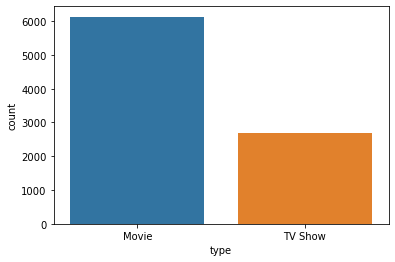

In [73]:
sns.countplot(x=data_netflix['type'])
plt.show()

### Q2. Quantos titulos possuem por classificação indicativa?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'TV-MA'),
  Text(2, 0, 'PG'),
  Text(3, 0, 'TV-14'),
  Text(4, 0, 'TV-PG'),
  Text(5, 0, 'TV-Y'),
  Text(6, 0, 'TV-Y7'),
  Text(7, 0, 'R'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'G'),
  Text(10, 0, 'NC-17'),
  Text(11, 0, '74 min'),
  Text(12, 0, '84 min'),
  Text(13, 0, '66 min'),
  Text(14, 0, 'NR'),
  Text(15, 0, 'TV-Y7-FV'),
  Text(16, 0, 'UR')])

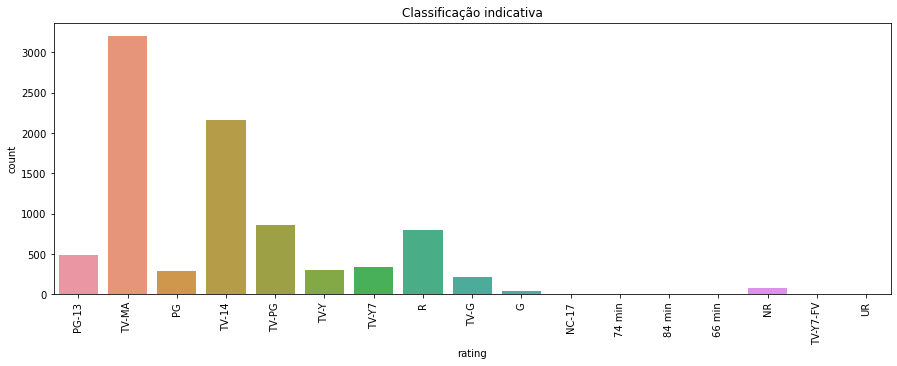

In [67]:
fig  = plt.subplots(figsize=(15, 5))

sns.countplot(x=data_netflix.rating).set(title="Classificação indicativa")
plt.xticks(rotation=90)

### Q3. Quais países tem mais produções adicionadas?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'South Korea'),
  Text(5, 0, 'Canada'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'France'),
  Text(8, 0, 'Mexico'),
  Text(9, 0, 'Egypt'),
  Text(10, 0, 'Turkey'),
  Text(11, 0, 'Nigeria'),
  Text(12, 0, 'Australia'),
  Text(13, 0, 'Taiwan'),
  Text(14, 0, 'Indonesia')])

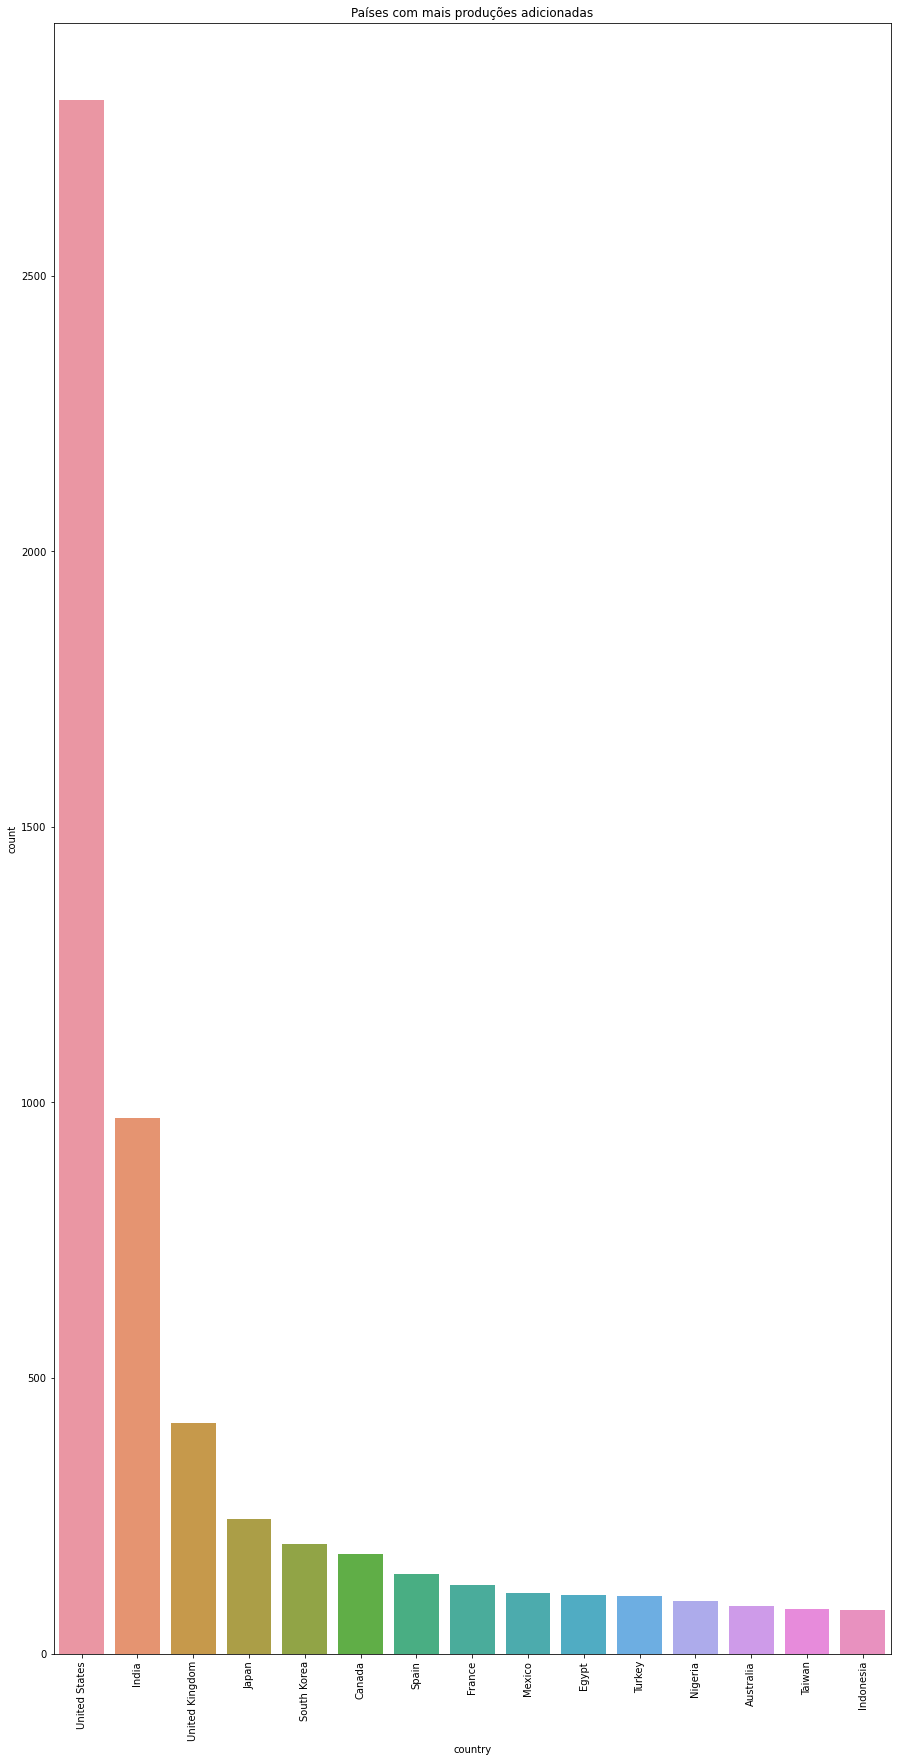

In [64]:
fig  = plt.subplots(figsize=(15, 30))

sns.countplot(x=data_netflix.country,order=data_netflix['country'].value_counts().index[0:15]).set(title="Países com mais produções adicionadas")
plt.xticks(rotation=90)

### Q.4 Quais diretores possuem títulos publicados?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Raúl Campos, Jan Suter'),
  Text(2, 0, 'Marcus Raboy'),
  Text(3, 0, 'Suhas Kadav'),
  Text(4, 0, 'Jay Karas'),
  Text(5, 0, 'Cathy Garcia-Molina'),
  Text(6, 0, 'Martin Scorsese'),
  Text(7, 0, 'Youssef Chahine'),
  Text(8, 0, 'Jay Chapman'),
  Text(9, 0, 'Steven Spielberg'),
  Text(10, 0, 'Don Michael Paul'),
  Text(11, 0, 'David Dhawan'),
  Text(12, 0, 'Yılmaz Erdoğan'),
  Text(13, 0, 'Lance Bangs'),
  Text(14, 0, 'Kunle Afolayan')])

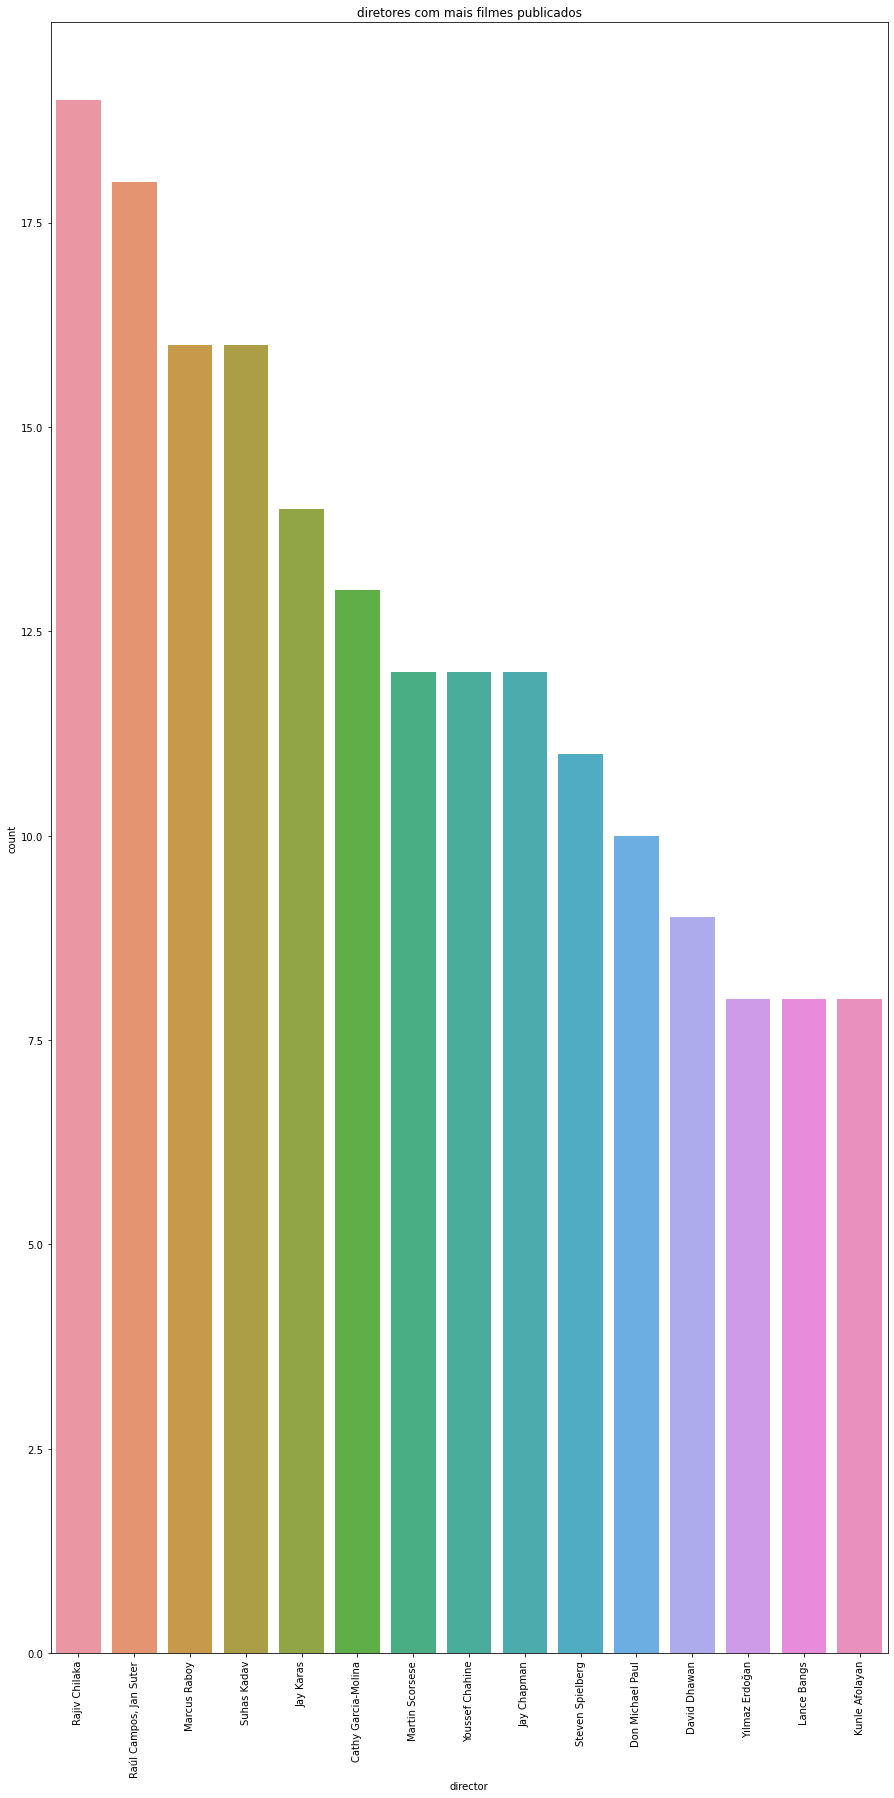

In [71]:
fig  = plt.subplots(figsize=(15, 30))

sns.countplot(x=data_netflix.director,order=data_netflix['director'].value_counts().index[0:15]).set(title="diretores com mais filmes publicados")
plt.xticks(rotation=90)

## Q.5 Qual a evolução do site?

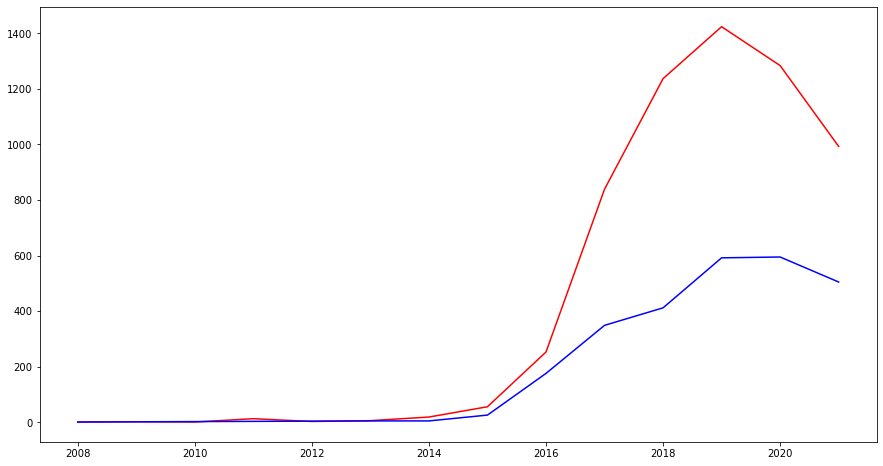

In [55]:
plt.figure(figsize=(15,8))



filme = data_netflix[data_netflix['type'] == 'Movie']
seriado = data_netflix[data_netflix['type'] == 'TV Show']
adicionadoTV= filme['ano'].value_counts()
adicionadoSerie= seriado['ano'].value_counts()

sns.lineplot(x=adicionadoTV.index,y=adicionadoTV.values, color="red")
sns.lineplot(x=adicionadoSerie.index,y=adicionadoSerie.values, color="blue")
plt.show()

## Conclusão:

- Existem mais séries que filmes no catálogo.
- Estados unicos é o país que mais produções adicionadas, seguido por índia, reino unido e japão.
- O diretor com mais filmes no catálogo é Rajiv Chilaka.
- Existe uma tendencia de queda no catálogo desde o meio de 2020.